In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import sqlite3
import zipfile as zf
import os


In [277]:
files = zf.ZipFile('./data/im.db.zip', 'r') #these lines create a im.db file which is too big to push
files.extractall() #these lines create a im.db file which is too big to push
con = sqlite3.connect("./im.db")

Below is a csv table with movie names, a studio abbreviation, the domestic gross, the foreign gross, and the year.

In [278]:
bom = pd.read_csv('./data/bom.movie_gross.csv.gz')
pd.read_csv('./data/bom.movie_gross.csv.gz')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [279]:
bom['foreign_gross'].isnull().sum() #keep
bom['studio'].isnull().sum() #keep until we merge 

5

In [280]:
df = pd.read_csv('./data/rt.movie_info.tsv.gz', delimiter = '\t')

#pd.read_csv('./data/rt.movie_info.tsv.gz', delimiter = '\t')

In [281]:
df['box_office'].isnull().sum() #too much nullvalues to be able use this dataset
                                #no name section so can't do much

1220

In [282]:
#this one has some funky encoding in it? It doesn't use utf-8 but latin1
# utf-8 and latin1 are the most common encoding but there can be others

# pd.read_csv('./data/rt.reviews.tsv.gz', delimiter = '\t', encoding= 'latin1' )

In [283]:
tmdb = pd.read_csv('./data/tmdb.movies.csv.gz')
pd.read_csv('./data/tmdb.movies.csv.gz')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [284]:
rating_and_gross = bom.merge(tmdb, how='inner', left_on='title', right_on='title').sort_values('domestic_gross', ascending=False)

rating_and_gross

#The table seems to be sorting weird, we are going to have to figure out what is going on
#Anything over 1 billion with show up as 1,131.6 which is 1,131,600,000
#We need to look carefully at duplicates, for example index 2488 is the wrong black panther based on the number of reviews. The correct one is 2489.

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
1428,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,14172,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,7.4,12641
1429,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,17385,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,7.4,12641
2489,Black Panther,BV,700100000.0,646900000,2018,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,7.4,12365
2488,Black Panther,BV,700100000.0,646900000,2018,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11
2487,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,Solace,LGP,NaN,22400000,2016,10512,[],167513,en,Solace,0.600,2013-03-01,6.0,1
1968,Solace,LGP,NaN,22400000,2016,17583,"[53, 80, 9648]",339527,en,Solace,9.878,2016-12-16,6.3,1258
1969,Solace,LGP,NaN,22400000,2016,20867,"[53, 80, 9648]",339527,en,Solace,9.878,2016-12-16,6.3,1258
1970,Solace,LGP,NaN,22400000,2016,25128,[18],549325,en,Solace,2.772,2018-09-23,5.0,1


In [285]:
rating_and_gross[rating_and_gross['title']== 'Avengers: Age of Ultron']

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
1432,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457


In [286]:
tmdb['vote_count'].isnull().sum()

0

In [287]:
tmdb['title'].isnull().sum()

0

In [288]:
tmdb['original_title'].isnull().sum()

0

In [289]:
tmdb['vote_count'].isnull().sum()

0

In [290]:
tmdb['vote_average'].isnull().sum()

0

In [291]:
tmdb['title'].unique().shape #deal with duplicates

(24688,)

In [292]:
tmdb['release_date'].isnull().sum()

0

In [293]:
tn = pd.read_csv('./data/tn.movie_budgets.csv.gz')
pd.read_csv('./data/tn.movie_budgets.csv.gz')
#check how many are 0 potentially but the zeros would make send in this case


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [294]:
budget_rating_gross =   rating_and_gross.merge(tn, how='inner', left_on='title', right_on='movie')

In [295]:
budget_rating_gross.shape
#for this new df we want to add 2 columns, the first will be worldwide_gross - production_budget, the second is the ratio of worldwide_gross/production budget
#After we delete duplicates, we want to do a .value_counts() on name so that if there is a duplicate similar to Black Panter
#Where there is an obvious error we can make decisions on a case by case basis.

(1395, 20)

In [296]:
clean_columns = budget_rating_gross.drop(['Unnamed: 0', 'genre_ids', 'original_title', 'domestic_gross_x', 'foreign_gross', 'movie', 'id_x', 'id_y'], axis=1)
clean_columns

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
1,Black Panther,BV,2018,en,2.058,2011-01-18,5.1,11,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018","$200,000,000","$608,581,744","$1,242,520,711"
...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013","$15,000,000",$0,"$20,898,221"
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001","$400,000","$44,452","$44,452"
1392,Jackpot,DR,2014,en,0.600,2012-07-14,6.0,1,"Jul 27, 2001","$400,000","$44,452","$44,452"
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010","$10,000,000",$0,"$1,642,939"


In [297]:
clean_columns['worldwide_gross'] = clean_columns['worldwide_gross'].str.replace('$', '')
clean_columns['worldwide_gross'] = clean_columns['worldwide_gross'].str.replace(',', '')

In [298]:
clean_columns['worldwide_gross'] = clean_columns['worldwide_gross'].astype(int)

In [299]:
clean_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1395 non-null   object 
 1   studio             1394 non-null   object 
 2   year               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   popularity         1395 non-null   float64
 5   release_date_x     1395 non-null   object 
 6   vote_average       1395 non-null   float64
 7   vote_count         1395 non-null   int64  
 8   release_date_y     1395 non-null   object 
 9   production_budget  1395 non-null   object 
 10  domestic_gross_y   1395 non-null   object 
 11  worldwide_gross    1395 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 141.7+ KB


In [300]:
clean_columns['domestic_gross_y'] = clean_columns['domestic_gross_y'].str.replace('$', '')
clean_columns['domestic_gross_y'] = clean_columns['domestic_gross_y'].str.replace(',', '')

In [301]:
clean_columns['domestic_gross_y'] = clean_columns['domestic_gross_y'].astype(int)

In [302]:
clean_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1395 non-null   object 
 1   studio             1394 non-null   object 
 2   year               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   popularity         1395 non-null   float64
 5   release_date_x     1395 non-null   object 
 6   vote_average       1395 non-null   float64
 7   vote_count         1395 non-null   int64  
 8   release_date_y     1395 non-null   object 
 9   production_budget  1395 non-null   object 
 10  domestic_gross_y   1395 non-null   int64  
 11  worldwide_gross    1395 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 141.7+ KB


In [303]:
clean_columns['foreign_gross'] = clean_columns['worldwide_gross'] - clean_columns['domestic_gross_y']

In [304]:
clean_columns

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018","$200,000,000",700059566,1348258224,648198658
1,Black Panther,BV,2018,en,2.058,2011-01-18,5.1,11,"Feb 16, 2018","$200,000,000",700059566,1348258224,648198658
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018","$300,000,000",678815482,2048134200,1369318718
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015","$215,000,000",652270625,1648854864,996584239
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018","$200,000,000",608581744,1242520711,633938967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013","$15,000,000",0,20898221,20898221
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001","$400,000",44452,44452,0
1392,Jackpot,DR,2014,en,0.600,2012-07-14,6.0,1,"Jul 27, 2001","$400,000",44452,44452,0
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010","$10,000,000",0,1642939,1642939


In [305]:
clean_columns['production_budget'] = clean_columns['production_budget'].str.replace('$', '')
clean_columns['production_budget'] = clean_columns['production_budget'].str.replace(',', '')

In [306]:
clean_columns['production_budget'] = clean_columns['production_budget'].astype(int)

In [307]:
clean_columns

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658
1,Black Panther,BV,2018,en,2.058,2011-01-18,5.1,11,"Feb 16, 2018",200000000,700059566,1348258224,648198658
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018",300000000,678815482,2048134200,1369318718
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015",215000000,652270625,1648854864,996584239
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018",200000000,608581744,1242520711,633938967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013",15000000,0,20898221,20898221
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0
1392,Jackpot,DR,2014,en,0.600,2012-07-14,6.0,1,"Jul 27, 2001",400000,44452,44452,0
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010",10000000,0,1642939,1642939


In [308]:
clean_columns['gross_to_budget_ratio'] = clean_columns['worldwide_gross'] / clean_columns['production_budget']

In [309]:
clean_columns.sort_values(by='gross_to_budget_ratio', ascending=False)

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
824,The Gallows,WB (NL),2015,en,9.166,2015-07-10,4.8,591,"Jul 10, 2015",100000,22764410,41656474,18892064,416.564740
499,The Devil Inside,Par.,2012,en,7.403,2012-01-06,4.7,441,"Jan 6, 2012",1000000,53262945,101759490,48496545,101.759490
496,Insidious,FD,2011,en,16.197,2011-04-01,6.9,3582,"Apr 1, 2011",1500000,54009150,99870886,45861736,66.580591
712,Unfriended,Uni.,2015,en,8.120,2015-04-17,5.4,2019,"Apr 17, 2015",1000000,32789645,64364198,31574553,64.364198
312,Paranormal Activity 2,Par.,2010,en,8.163,2010-10-21,5.7,1342,"Oct 20, 2010",3000000,84752907,177512032,92759125,59.170677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,Eden,BG,2015,en,0.600,2018-11-25,0.0,1,"Jan 19, 2016",2300000,0,0,0,0.000000
1348,Eden,BG,2015,en,5.373,2015-06-19,5.8,57,"Jan 19, 2016",2300000,0,0,0,0.000000
592,Snitch,LG/S,2013,en,16.673,2013-02-22,5.9,1493,"Dec 31, 2012",850000,0,0,0,0.000000
1349,Eden,BG,2015,en,5.373,2015-06-19,5.8,57,"Jan 19, 2016",2300000,0,0,0,0.000000


In [310]:
test_clean_columns = clean_columns.drop_duplicates()

In [311]:
test_clean_columns

vote_count_max = test_clean_columns.groupby(['title','studio']).vote_count.transform(max)
movies_clean = test_clean_columns.loc[test_clean_columns.vote_count == vote_count_max]


In [312]:
movies_clean

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,6.827114
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015",215000000,652270625,1648854864,996584239,7.669092
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018",200000000,608581744,1242520711,633938967,6.212604
5,Rogue One: A Star Wars Story,BV,2016,en,21.401,2016-12-16,7.5,9296,"Dec 16, 2016",200000000,532177324,1049102856,516925532,5.245514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Skin Trade,Magn.,2015,en,9.362,2014-11-07,5.6,96,"May 8, 2015",9000000,1242,1242,0,0.000138
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013",15000000,0,20898221,20898221,1.393215
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0,0.111130
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010",10000000,0,1642939,1642939,0.164294


In [313]:
duplicate_list = test_clean_columns[test_clean_columns.duplicated(['title'], keep=False)]
#We have a dataframe of duplicate titles, we need to drop one title over another based on the value_count
#Can we left join two duplicate titles based on value_count?
#Can we for loop and drop based on vote_count?


In [314]:
duplicate_list['title'].unique()

array(['Black Panther', 'Wonder Woman', 'Frozen', 'Inside Out', 'Moana',
       'Brave', 'The Karate Kid', 'Get Out', 'Split', 'Salt',
       'Robin Hood', 'The Mule', 'Noah', 'Non-Stop', 'Unstoppable',
       'Pixels', 'Book Club', 'The Visit', 'Unknown', 'Black Mass',
       'Vacation', 'Fantastic Four', 'Project X', 'Tag', 'Sinister',
       'Vice', 'The Judge', 'Snatched', 'Spotlight', 'Edge of Darkness',
       'Snitch', 'Truth or Dare', 'Nerve', 'Brooklyn', 'Alpha',
       'The Boy Next Door', 'The Gambler', 'Adrift', 'The Forest',
       'Leap Year', 'The Lazarus Effect', 'Transcendence',
       'Your Highness', 'The Master', 'The Raven', 'Whiplash',
       'Battle of the Sexes', 'Let Me In', 'Paranoia', 'The Collection',
       'Believe', "Won't Back Down", 'The Apparition', 'Morgan', 'Shame',
       'Friend Request', 'Another Year', 'Youth', 'Trance', 'Legend',
       'Flipped', 'A Better Life', 'Stone', 'The Wall', 'The Joneses',
       'The Square', 'Mandy', 'The D Train', '

In [315]:
#or title in duplicate_list:
#    if title.value_count > 1 
#     keep [value_count].max()
    

In [316]:
duplicate_list

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
1,Black Panther,BV,2018,en,2.058,2011-01-18,5.1,11,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
13,Wonder Woman,WB,2017,en,31.618,2017-06-02,7.3,12566,"Jun 2, 2017",150000000,412563408,821133378,408569970,5.474223
14,Wonder Woman,WB,2017,en,2.841,2013-09-29,5.9,34,"Jun 2, 2017",150000000,412563408,821133378,408569970,5.474223
20,Frozen,BV,2013,en,9.678,2010-02-05,5.8,987,"Nov 22, 2013",150000000,400738009,1272469910,871731901,8.483133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,Trash,FCW,2015,pt,7.179,2015-10-09,7.1,353,"Oct 9, 2015",12000000,17484,6553186,6535702,0.546099
1380,Wolves,KE,2014,en,4.270,2016-10-25,5.8,22,"Nov 14, 2014",18000000,0,94953,94953,0.005275
1382,Wolves,KE,2014,en,8.627,2014-11-14,5.8,151,"Nov 14, 2014",18000000,0,94953,94953,0.005275
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0,0.111130


In [317]:
vote_count_max = duplicate_list.groupby(['title','studio']).vote_count.transform(max)
test = duplicate_list.loc[duplicate_list.vote_count == vote_count_max]
#This seems to do what we needed to do but there may be implications we aren't seeing. 
#For example it is keeping the release date and other values associated with the title with the max vote_count.

In [318]:
duplicate_list.groupby(['title','studio']).vote_count.max()

title                studio  
A Better Life        Sum.           97
Adrift               STX          1264
Alpha                Studio 8     1167
Another Year         SPC           150
Battle of the Sexes  FoxS         1045
                                 ...  
Wolves               KE            151
Won't Back Down      Fox            64
Wonder Woman         WB          12566
Your Highness        Uni.          735
Youth                FoxS         1098
Name: vote_count, Length: 77, dtype: int64

In [319]:
test

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
13,Wonder Woman,WB,2017,en,31.618,2017-06-02,7.3,12566,"Jun 2, 2017",150000000,412563408,821133378,408569970,5.474223
21,Frozen,BV,2013,en,26.183,2013-11-27,7.3,9767,"Nov 22, 2013",150000000,400738009,1272469910,871731901,8.483133
26,Inside Out,BV,2015,en,24.797,2015-06-19,8.0,12691,"Jun 19, 2015",175000000,356461711,854235992,497774281,4.881349
63,Moana,BV,2016,en,4.419,2016-11-23,7.5,6907,"Nov 23, 2016",150000000,248757044,637517365,388760321,4.250116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Eden,BG,2015,en,6.877,2012-03-11,6.8,100,"Jan 19, 2016",2300000,0,0,0,0.000000
1366,The Other Woman,IFC,2011,en,11.894,2014-04-25,6.3,2276,"Apr 25, 2014",40000000,83911193,195111193,111200000,4.877780
1374,Trash,FCW,2015,pt,7.179,2015-10-09,7.1,353,"Oct 9, 2015",12000000,17484,6553186,6535702,0.546099
1382,Wolves,KE,2014,en,8.627,2014-11-14,5.8,151,"Nov 14, 2014",18000000,0,94953,94953,0.005275


In [320]:
test

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
13,Wonder Woman,WB,2017,en,31.618,2017-06-02,7.3,12566,"Jun 2, 2017",150000000,412563408,821133378,408569970,5.474223
21,Frozen,BV,2013,en,26.183,2013-11-27,7.3,9767,"Nov 22, 2013",150000000,400738009,1272469910,871731901,8.483133
26,Inside Out,BV,2015,en,24.797,2015-06-19,8.0,12691,"Jun 19, 2015",175000000,356461711,854235992,497774281,4.881349
63,Moana,BV,2016,en,4.419,2016-11-23,7.5,6907,"Nov 23, 2016",150000000,248757044,637517365,388760321,4.250116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Eden,BG,2015,en,6.877,2012-03-11,6.8,100,"Jan 19, 2016",2300000,0,0,0,0.000000
1366,The Other Woman,IFC,2011,en,11.894,2014-04-25,6.3,2276,"Apr 25, 2014",40000000,83911193,195111193,111200000,4.877780
1374,Trash,FCW,2015,pt,7.179,2015-10-09,7.1,353,"Oct 9, 2015",12000000,17484,6553186,6535702,0.546099
1382,Wolves,KE,2014,en,8.627,2014-11-14,5.8,151,"Nov 14, 2014",18000000,0,94953,94953,0.005275


In [321]:
tn['release_date'].isnull().sum()

0

In [322]:
tn['movie'].isnull().sum()

0

In [323]:
tn['production_budget'].isnull().sum()

0

In [324]:
tn['domestic_gross'].isnull().sum()

0

In [325]:
tn['worldwide_gross'].isnull().sum()

0

In [326]:
movies_clean.sort_values(['gross_to_budget_ratio'], ascending=False)

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
824,The Gallows,WB (NL),2015,en,9.166,2015-07-10,4.8,591,"Jul 10, 2015",100000,22764410,41656474,18892064,416.564740
499,The Devil Inside,Par.,2012,en,7.403,2012-01-06,4.7,441,"Jan 6, 2012",1000000,53262945,101759490,48496545,101.759490
496,Insidious,FD,2011,en,16.197,2011-04-01,6.9,3582,"Apr 1, 2011",1500000,54009150,99870886,45861736,66.580591
712,Unfriended,Uni.,2015,en,8.120,2015-04-17,5.4,2019,"Apr 17, 2015",1000000,32789645,64364198,31574553,64.364198
312,Paranormal Activity 2,Par.,2010,en,8.163,2010-10-21,5.7,1342,"Oct 20, 2010",3000000,84752907,177512032,92759125,59.170677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Skin Trade,Magn.,2015,en,9.362,2014-11-07,5.6,96,"May 8, 2015",9000000,1242,1242,0,0.000138
1346,Eden,BG,2015,en,6.877,2012-03-11,6.8,100,"Jan 19, 2016",2300000,0,0,0,0.000000
1182,Trance,FoxS,2013,en,9.571,2013-04-05,6.6,1348,"Dec 31, 2012",950000,0,0,0,0.000000
1273,Point Blank,Magn.,2011,fr,6.021,2011-07-29,6.6,230,"Sep 18, 1967",3000000,0,0,0,0.000000


In [327]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1394
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1178 non-null   object 
 1   studio                 1178 non-null   object 
 2   year                   1178 non-null   int64  
 3   original_language      1178 non-null   object 
 4   popularity             1178 non-null   float64
 5   release_date_x         1178 non-null   object 
 6   vote_average           1178 non-null   float64
 7   vote_count             1178 non-null   int64  
 8   release_date_y         1178 non-null   object 
 9   production_budget      1178 non-null   int64  
 10  domestic_gross_y       1178 non-null   int64  
 11  worldwide_gross        1178 non-null   int64  
 12  foreign_gross          1178 non-null   int64  
 13  gross_to_budget_ratio  1178 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 138.0+ 

In [328]:
movies_clean.describe()

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
count,1178.000000,1178.000000,1178.000000,1178.000000,1.178000e+03,1.178000e+03,1.178000e+03,1.178000e+03,1178.000000
mean,2013.624788,13.662665,6.390407,2367.171477,4.838629e+07,6.265907e+07,1.576808e+08,9.502176e+07,4.418544
std,2.518606,7.721193,0.784602,2947.947795,5.685266e+07,8.636529e+07,2.399435e+08,1.615476e+08,13.716197
min,2010.000000,0.600000,3.100000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2011.000000,8.823500,5.900000,486.000000,1.000000e+07,8.631720e+06,1.889429e+07,6.398370e+06,1.178091
50%,2014.000000,11.871000,6.400000,1288.000000,2.800000e+07,3.455121e+07,6.857444e+07,2.913372e+07,2.466294
75%,2016.000000,16.268250,6.900000,2989.250000,6.000000e+07,7.751070e+07,1.801236e+08,1.028462e+08,4.303643
max,2018.000000,80.773000,8.400000,22186.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.369319e+09,416.564740


In [329]:
import numpy as np


q3, q1 = np.percentile(movies_clean['gross_to_budget_ratio'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = movies_clean['gross_to_budget_ratio'].mean()-(iqr*1.5)

upper_limit = movies_clean['gross_to_budget_ratio'].mean()+(iqr*1.5)

lower_limit, upper_limit

(-0.2697839574098566, 9.106872819728032)

In [330]:
movies_oultierless = movies_clean[movies_clean['gross_to_budget_ratio']<upper_limit]
movies_oultierless

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,6.827114
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015",215000000,652270625,1648854864,996584239,7.669092
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018",200000000,608581744,1242520711,633938967,6.212604
5,Rogue One: A Star Wars Story,BV,2016,en,21.401,2016-12-16,7.5,9296,"Dec 16, 2016",200000000,532177324,1049102856,516925532,5.245514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Skin Trade,Magn.,2015,en,9.362,2014-11-07,5.6,96,"May 8, 2015",9000000,1242,1242,0,0.000138
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013",15000000,0,20898221,20898221,1.393215
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0,0.111130
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010",10000000,0,1642939,1642939,0.164294


In [331]:
movies_clean.shape

(1178, 14)

In [332]:
q3, q1 = np.percentile(movies_clean['worldwide_gross'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit_wwg = movies_clean['worldwide_gross'].mean()-(iqr*1.5)

upper_limit_wwg = movies_clean['worldwide_gross'].mean()+(iqr*1.5)

lower_limit_wwg, upper_limit_wwg

(-84163172.32470289, 399524828.17529714)

In [333]:
movies_without_wwg_outliers = movies_clean[movies_clean['worldwide_gross']<upper_limit_wwg]

In [334]:
movies_without_wwg_outliers

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
88,Solo: A Star Wars Story,BV,2018,en,29.502,2018-05-25,6.6,3838,"May 25, 2018",275000000,213767512,393151347,179383835,1.429641
99,22 Jump Street,Sony,2014,en,11.176,2014-06-13,6.9,5167,"Jun 13, 2014",50000000,191719337,331333876,139614539,6.626678
103,A Quiet Place,Par.,2018,en,29.154,2018-04-06,7.3,5848,"Apr 6, 2018",17000000,188024361,334522294,146497933,19.677782
107,Pitch Perfect 2,Uni.,2015,en,18.469,2015-05-15,6.8,3599,"May 15, 2015",29000000,184296230,287625468,103329238,9.918120
110,Lincoln,BV,2012,en,12.693,2012-11-16,6.8,2261,"Nov 9, 2012",65000000,182207973,273346281,91138308,4.205327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Skin Trade,Magn.,2015,en,9.362,2014-11-07,5.6,96,"May 8, 2015",9000000,1242,1242,0,0.000138
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013",15000000,0,20898221,20898221,1.393215
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0,0.111130
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010",10000000,0,1642939,1642939,0.164294


In [335]:
q3, q1 = np.percentile(movies_without_wwg_outliers['production_budget'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit_pb = movies_without_wwg_outliers['production_budget'].mean()-(iqr*1.5)

upper_limit_pb = movies_without_wwg_outliers['production_budget'].mean()+(iqr*1.5)

lower_limit_pb, upper_limit_pb

(-16794264.684060723, 88205735.31593928)

In [336]:
movies_without_wwg_or_pb_outliers = movies_without_wwg_outliers[movies_without_wwg_outliers['production_budget']<upper_limit_pb]

In [337]:
movies_without_wwg_or_pb_outliers

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
99,22 Jump Street,Sony,2014,en,11.176,2014-06-13,6.9,5167,"Jun 13, 2014",50000000,191719337,331333876,139614539,6.626678
103,A Quiet Place,Par.,2018,en,29.154,2018-04-06,7.3,5848,"Apr 6, 2018",17000000,188024361,334522294,146497933,19.677782
107,Pitch Perfect 2,Uni.,2015,en,18.469,2015-05-15,6.8,3599,"May 15, 2015",29000000,184296230,287625468,103329238,9.918120
110,Lincoln,BV,2012,en,12.693,2012-11-16,6.8,2261,"Nov 9, 2012",65000000,182207973,273346281,91138308,4.205327
116,The Karate Kid,Sony,2010,en,12.256,2010-06-10,6.3,3140,"Jun 11, 2010",40000000,176591618,351774938,175183320,8.794373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Skin Trade,Magn.,2015,en,9.362,2014-11-07,5.6,96,"May 8, 2015",9000000,1242,1242,0,0.000138
1390,Khumba,MNE,2013,en,9.597,2013-12-07,5.6,129,"Dec 6, 2013",15000000,0,20898221,20898221,1.393215
1391,Jackpot,DR,2014,no,2.864,2014-06-27,6.1,18,"Jul 27, 2001",400000,44452,44452,0,0.111130
1393,It's a Wonderful Afterlife,UTV,2010,en,1.332,2010-10-08,4.6,12,"Oct 8, 2010",10000000,0,1642939,1642939,0.164294


In [338]:
movies_clean.describe()

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
count,1178.000000,1178.000000,1178.000000,1178.000000,1.178000e+03,1.178000e+03,1.178000e+03,1.178000e+03,1178.000000
mean,2013.624788,13.662665,6.390407,2367.171477,4.838629e+07,6.265907e+07,1.576808e+08,9.502176e+07,4.418544
std,2.518606,7.721193,0.784602,2947.947795,5.685266e+07,8.636529e+07,2.399435e+08,1.615476e+08,13.716197
min,2010.000000,0.600000,3.100000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2011.000000,8.823500,5.900000,486.000000,1.000000e+07,8.631720e+06,1.889429e+07,6.398370e+06,1.178091
50%,2014.000000,11.871000,6.400000,1288.000000,2.800000e+07,3.455121e+07,6.857444e+07,2.913372e+07,2.466294
75%,2016.000000,16.268250,6.900000,2989.250000,6.000000e+07,7.751070e+07,1.801236e+08,1.028462e+08,4.303643
max,2018.000000,80.773000,8.400000,22186.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.369319e+09,416.564740


In [339]:
#There be null values recorded as $0 for worldwide_gross, domestic_gross, and foreign_gross.
#We may also need to remove outliers from production_budget and worldwide_gross 
                #before calculating gross_to_budget_ratio.

In [340]:
movies_oultierless.shape

(1079, 14)

In [341]:
movies_oultierless.describe()

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
count,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1079.000000
mean,2013.566265,13.508627,6.367655,2255.665431,5.136563e+07,5.997545e+07,1.518143e+08,9.183886e+07,2.670057
std,2.512494,7.756348,0.770226,2882.076676,5.814281e+07,8.503854e+07,2.369155e+08,1.593237e+08,2.067077
min,2010.000000,0.600000,3.100000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2011.000000,8.769000,5.900000,467.500000,1.250000e+07,7.665450e+06,1.728506e+07,5.589738e+06,1.098119
50%,2013.000000,11.569000,6.400000,1211.000000,3.000000e+07,3.218702e+07,6.335411e+07,2.700000e+07,2.254640
75%,2016.000000,15.932500,6.900000,2782.000000,6.500000e+07,7.348415e+07,1.725323e+08,9.837941e+07,3.791616
max,2018.000000,80.773000,8.300000,22186.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.369319e+09,9.092430


In [342]:
#Removal of outliers greater than upper_limit was 99 datapoints. 

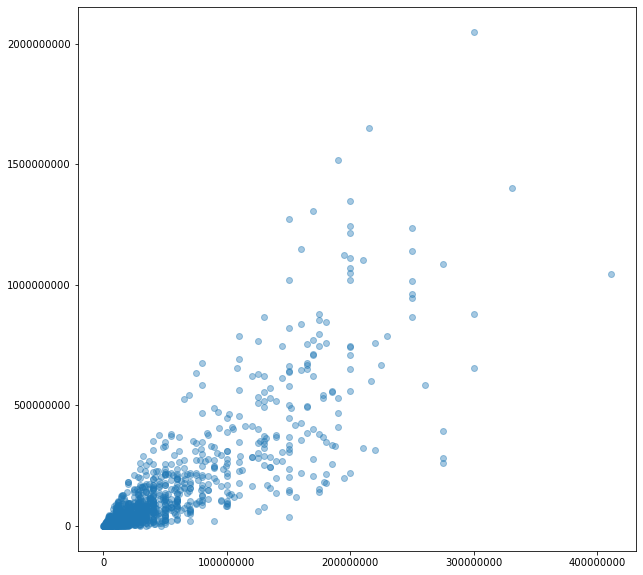

In [343]:
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_oultierless['production_budget'] , y = movies_oultierless['worldwide_gross'], alpha = .4);


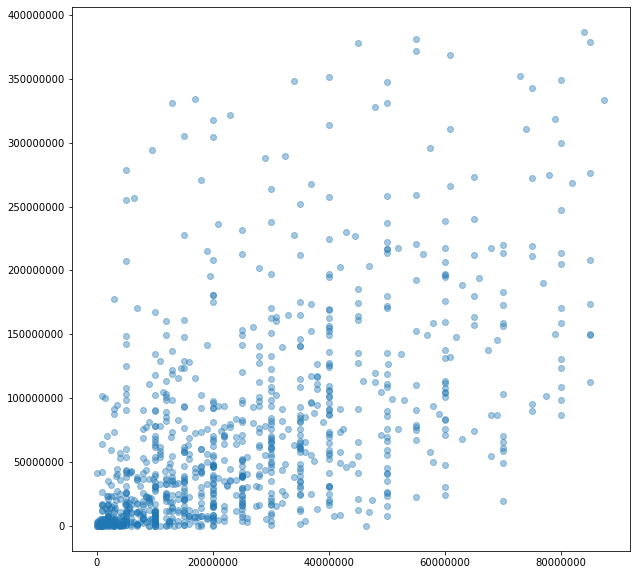

In [344]:
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_without_wwg_or_pb_outliers['production_budget'] , y = movies_without_wwg_or_pb_outliers['worldwide_gross'], alpha = .4);


In [345]:
np.corrcoef(movies_without_wwg_or_pb_outliers['production_budget'] , y = movies_without_wwg_or_pb_outliers['worldwide_gross'])

array([[1.        , 0.57926147],
       [0.57926147, 1.        ]])

In [346]:
np.corrcoef(movies_oultierless['production_budget'] , y = movies_oultierless['worldwide_gross'])

array([[1.        , 0.82371066],
       [0.82371066, 1.        ]])

In [347]:
#There is a strong positive correlation between production_budget and worldwide_gross.


In [348]:
movies_clean.head()

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,6.827114
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015",215000000,652270625,1648854864,996584239,7.669092
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018",200000000,608581744,1242520711,633938967,6.212604
5,Rogue One: A Star Wars Story,BV,2016,en,21.401,2016-12-16,7.5,9296,"Dec 16, 2016",200000000,532177324,1049102856,516925532,5.245514


In [349]:
movies_clean['studio'].value_counts()

Uni.    117
Fox     109
WB       96
Par.     73
BV       71
       ... 
Jan.      1
IM        1
LGP       1
CE        1
DR        1
Name: studio, Length: 91, dtype: int64

In [350]:
import matplotlib.pyplot as plt

In [351]:
top_ten_most_common_studios = movies_clean['studio'].value_counts().head(20)
top_ten_most_common_studios.index

Index(['Uni.', 'Fox', 'WB', 'Par.', 'BV', 'Sony', 'LGF', 'FoxS', 'Wein.',
       'WB (NL)', 'Focus', 'LG/S', 'SPC', 'ORF', 'Rela.', 'IFC', 'SGem',
       'RAtt.', 'A24', 'Magn.'],
      dtype='object')

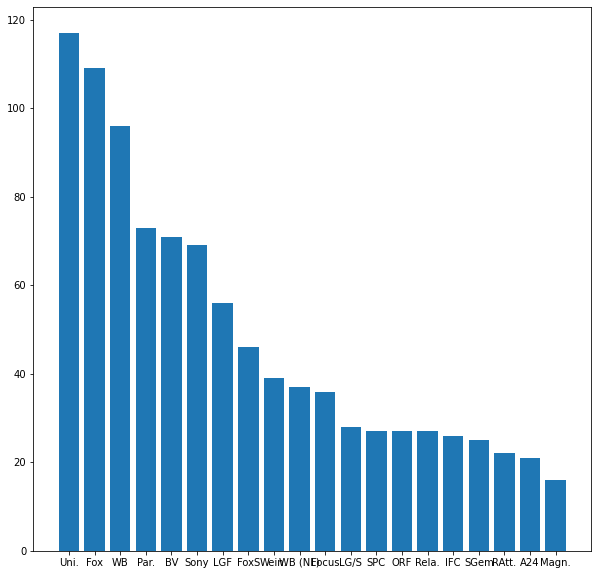

In [352]:
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=top_ten_most_common_studios.index.astype(str), height=top_ten_most_common_studios);
#most common competitors
#Where is Disney? BV = Disney. Did they buy one of these companies, Who owns who?
#We have a WB and WB (NL), we have Fox and FoxS

In [353]:
movies_clean.head(1)

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.14,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291


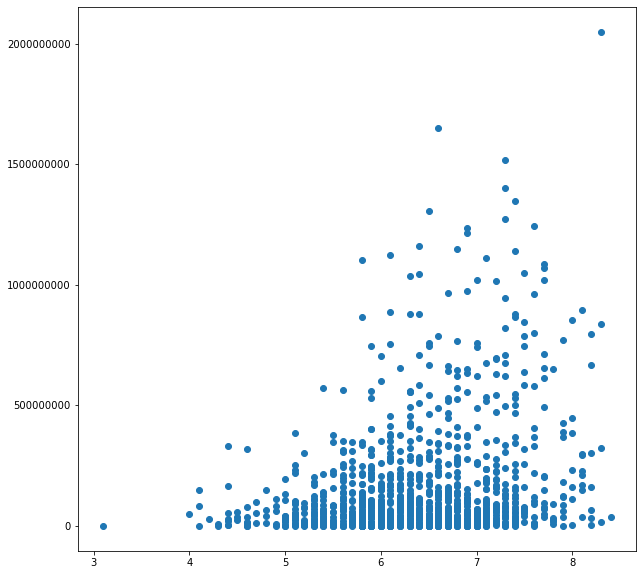

In [354]:
#vote_average vs worldwide_gross
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_clean['vote_average'] , y = movies_clean['worldwide_gross']);


In [355]:
np.corrcoef(movies_clean['vote_average'] , y = movies_clean['worldwide_gross'])

array([[1.        , 0.25601557],
       [0.25601557, 1.        ]])

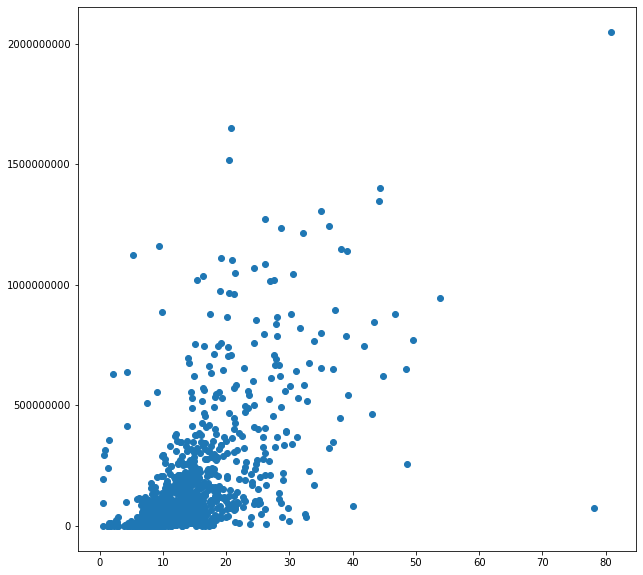

In [356]:
#popularity vs worldwide_gross
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_clean['popularity'] , y = movies_clean['worldwide_gross']);

In [357]:
np.corrcoef(movies_clean['popularity'] , y = movies_clean['worldwide_gross'])

array([[1.        , 0.62610992],
       [0.62610992, 1.        ]])

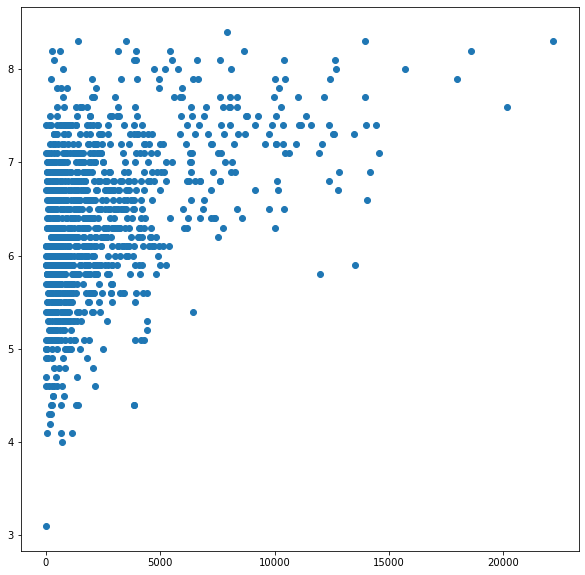

In [358]:
#vote_count vs vote_average
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_clean['vote_count'] , y = movies_clean['vote_average']);

In [359]:
np.corrcoef(movies_clean['vote_count'] , y = movies_clean['vote_average'])

array([[1.        , 0.43161011],
       [0.43161011, 1.        ]])

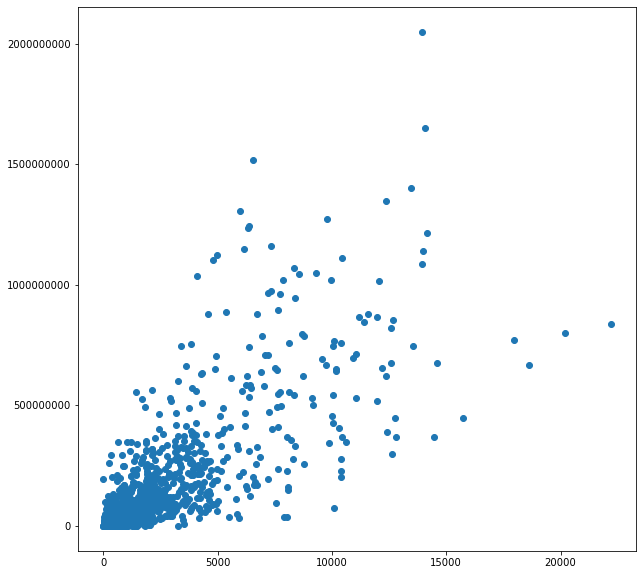

In [360]:
#vote_count vs worldwide_gross
fig, ax = plt.subplots(figsize=(10,10),)
ax.ticklabel_format(style='plain')
ax.scatter(movies_clean['vote_count'] , y = movies_clean['worldwide_gross']);

In [361]:
np.corrcoef(movies_clean['vote_count'] , y = movies_clean['worldwide_gross'])

array([[1.        , 0.76375647],
       [0.76375647, 1.        ]])

In [362]:
movies_clean.head()

,title,studio,year,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
0,Black Panther,BV,2018,en,44.140,2018-02-16,7.4,12365,"Feb 16, 2018",200000000,700059566,1348258224,648198658,6.741291
2,Avengers: Infinity War,BV,2018,en,80.773,2018-04-27,8.3,13948,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,6.827114
3,Jurassic World,Uni.,2015,en,20.709,2015-06-12,6.6,14056,"Jun 12, 2015",215000000,652270625,1648854864,996584239,7.669092
4,Incredibles 2,BV,2018,en,36.286,2018-06-15,7.6,6354,"Jun 15, 2018",200000000,608581744,1242520711,633938967,6.212604
5,Rogue One: A Star Wars Story,BV,2016,en,21.401,2016-12-16,7.5,9296,"Dec 16, 2016",200000000,532177324,1049102856,516925532,5.245514


In [363]:
studio_average_wwg = movies_clean.groupby(['studio']).mean(['worldwide_gross']).sort_values(['worldwide_gross'], ascending=False).head(20)
studio_average_wwg
#Some of these studios didn't show up in the most common studios

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
studio,,,,,,,,,
P/DW,2010.900000,14.669800,6.520000,3378.100000,1.334000e+08,1.682915e+08,5.078028e+08,3.395113e+08,3.356841
BV,2013.943662,20.720789,6.884507,5172.760563,1.326028e+08,1.806503e+08,4.660885e+08,2.854381e+08,3.215024
GrtIndia,2017.000000,10.406000,7.000000,252.000000,3.000000e+07,1.898579e+07,2.635029e+08,2.445171e+08,8.783430
Sony,2013.536232,15.910116,6.124638,2896.608696,7.003623e+07,9.850737e+07,2.474595e+08,1.489522e+08,3.725956
Fox,2013.761468,15.864165,6.341284,3228.642202,7.087615e+07,8.603548e+07,2.448908e+08,1.588553e+08,3.452967
Uni.,2013.914530,15.471205,6.208547,2774.666667,5.639060e+07,9.151146e+07,2.335837e+08,1.420722e+08,6.783907
WB (NL),2014.162162,15.099676,6.324324,3022.108108,5.807027e+07,9.236838e+07,2.308342e+08,1.384658e+08,17.495934
WB,2013.760417,16.591094,6.421875,3501.593750,8.338229e+07,9.287032e+07,2.273463e+08,1.344760e+08,3.303377
Par.,2013.780822,14.528986,6.302740,3167.013699,6.321918e+07,8.106085e+07,1.918638e+08,1.108029e+08,6.770556


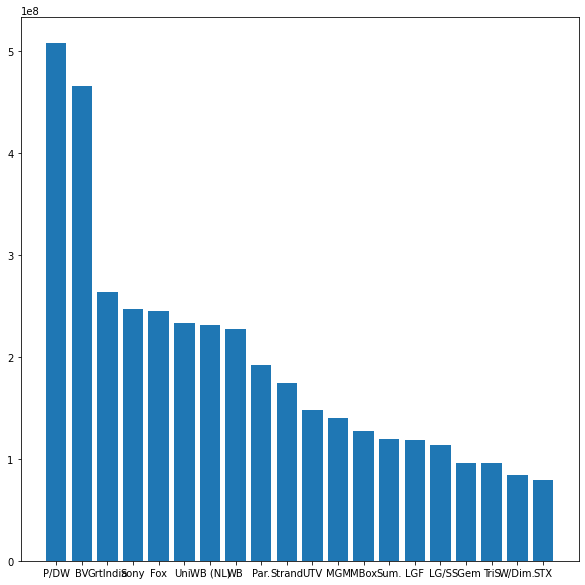

In [364]:
#studio vs average worldwide_gross per movie
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=studio_average_wwg.index.astype(str), height=studio_average_wwg['worldwide_gross']);


In [365]:
studio_popularity = movies_clean.groupby(['studio']).mean(['popularity']).sort_values(['popularity'], ascending=False).head(20)
studio_popularity

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
studio,,,,,,,,,
BV,2013.943662,20.720789,6.884507,5172.760563,1.326028e+08,1.806503e+08,4.660885e+08,2.854381e+08,3.215024
Studio 8,2018.000000,19.165000,6.100000,722.000000,4.050000e+07,2.992811e+07,6.278643e+07,3.285832e+07,1.409181
MGM,2014.000000,18.528500,6.350000,1809.500000,4.300000e+07,8.299287e+07,1.397796e+08,5.678676e+07,3.052134
LGP,2015.000000,17.867000,5.000000,1490.000000,2.000000e+06,3.633600e+04,6.328516e+06,6.292180e+06,3.164258
Amazon,2018.000000,16.925000,7.000000,752.000000,2.000000e+07,2.483472e+06,7.034615e+06,4.551143e+06,0.351731
LG/S,2014.035714,16.811821,6.392857,3106.071429,4.994107e+07,4.326474e+07,1.134813e+08,7.021656e+07,4.130800
STX,2017.133333,16.685600,6.446667,1394.000000,3.560667e+07,3.806757e+07,7.884986e+07,4.078229e+07,3.330413
WB,2013.760417,16.591094,6.421875,3501.593750,8.338229e+07,9.287032e+07,2.273463e+08,1.344760e+08,3.303377
Annapurna,2018.000000,16.314250,6.800000,591.750000,2.975000e+07,1.685711e+07,2.689162e+07,1.003451e+07,0.897799


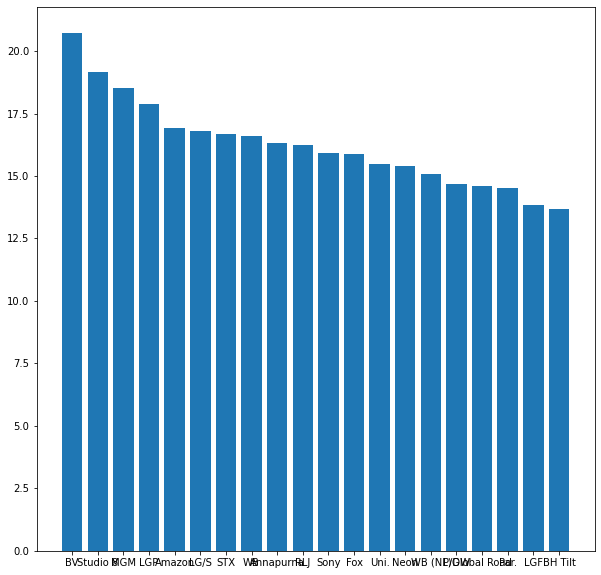

In [366]:
#studio vs popularity
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=studio_popularity.index.astype(str), height=studio_popularity['popularity']);

In [367]:
studio_vote_average = movies_clean.groupby(['studio']).mean(['vote_average']).sort_values(['vote_average'], ascending=False).head(20)
studio_vote_average

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
studio,,,,,,,,,
Orch.,2016.000000,12.545000,7.800000,915.000000,2.500000e+06,5.205471e+06,2.384553e+07,1.864006e+07,9.538213
Cleopatra,2016.000000,7.120000,7.500000,500.000000,8.000000e+06,8.270300e+04,1.738269e+07,1.729999e+07,2.172837
Neon,2017.000000,15.407000,7.500000,2904.000000,1.100000e+07,3.001453e+07,5.379741e+07,2.378288e+07,4.890674
Osci.,2011.333333,8.429333,7.433333,565.000000,4.333333e+06,1.796292e+06,6.200627e+06,4.404335e+06,1.321510
3D,2010.000000,2.746000,7.400000,12.000000,5.000000e+06,6.096582e+06,1.651520e+07,1.041862e+07,3.303041
MBox,2012.000000,12.695500,7.300000,2213.000000,4.630000e+07,5.317143e+07,1.273362e+08,7.416474e+07,4.271847
FCW,2015.000000,7.179000,7.100000,353.000000,1.200000e+07,1.748400e+04,6.553186e+06,6.535702e+06,0.546099
Cohen,2016.000000,7.575500,7.050000,452.500000,5.700000e+06,1.062572e+06,6.567390e+06,5.504818e+06,2.362176
IM,2012.000000,5.310000,7.000000,431.000000,4.000000e+06,6.410540e+05,4.230426e+06,3.589372e+06,1.057606


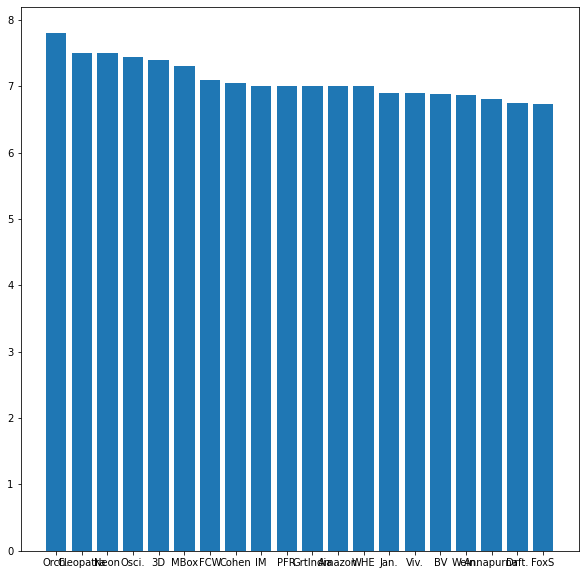

In [368]:
#studio vs vote_average
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=studio_vote_average.index.astype(str), height=studio_vote_average['vote_average']);

In [369]:
studio_vote_count = movies_clean.groupby(['studio']).mean(['vote_count']).sort_values(['vote_count'], ascending=False).head(20)
studio_vote_count

,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,foreign_gross,gross_to_budget_ratio
studio,,,,,,,,,
BV,2013.943662,20.720789,6.884507,5172.760563,1.326028e+08,1.806503e+08,4.660885e+08,2.854381e+08,3.215024
WB,2013.760417,16.591094,6.421875,3501.593750,8.338229e+07,9.287032e+07,2.273463e+08,1.344760e+08,3.303377
Strand,2010.000000,11.927000,6.300000,3479.000000,4.500000e+07,7.539504e+07,1.742782e+08,9.888318e+07,3.872849
P/DW,2010.900000,14.669800,6.520000,3378.100000,1.334000e+08,1.682915e+08,5.078028e+08,3.395113e+08,3.356841
Fox,2013.761468,15.864165,6.341284,3228.642202,7.087615e+07,8.603548e+07,2.448908e+08,1.588553e+08,3.452967
Par.,2013.780822,14.528986,6.302740,3167.013699,6.321918e+07,8.106085e+07,1.918638e+08,1.108029e+08,6.770556
LG/S,2014.035714,16.811821,6.392857,3106.071429,4.994107e+07,4.326474e+07,1.134813e+08,7.021656e+07,4.130800
WB (NL),2014.162162,15.099676,6.324324,3022.108108,5.807027e+07,9.236838e+07,2.308342e+08,1.384658e+08,17.495934
Neon,2017.000000,15.407000,7.500000,2904.000000,1.100000e+07,3.001453e+07,5.379741e+07,2.378288e+07,4.890674


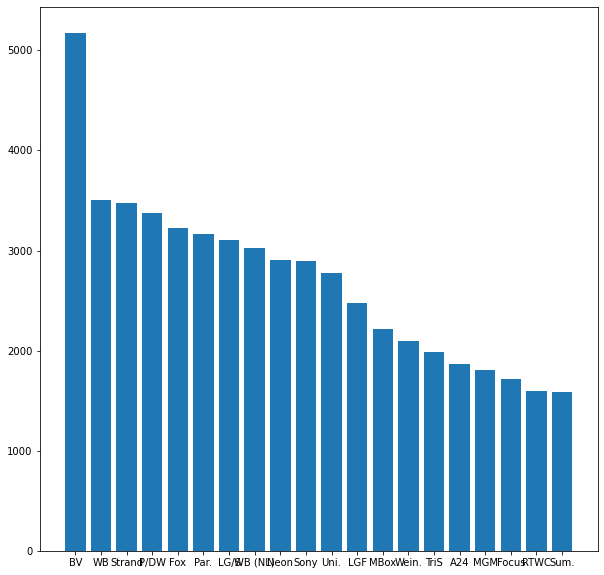

In [370]:
#studio and vote_count
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=studio_vote_count.index.astype(str), height=studio_vote_count['vote_count']);

In [371]:
files = zf.ZipFile('./data/im.db.zip', 'r') #these lines create a im.db file which is too big to push
files.extractall() #these lines create a im.db file which is too big to push
con = sqlite3.connect("./im.db")

In [372]:
titles = pd.read_sql("""
Select * 

From movie_basics
            
""", con)
titles

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [373]:
#pd.read_sql("""
#Select * 

#From known_for
            
#""", con).head()


In [374]:
#pd.read_sql("""
#Select * 

#From movie_akas
            
#""", con).head()


In [375]:
rating = pd.read_sql("""
Select * 

From movie_ratings
            
""", con)

rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [398]:
sql_df = pd.read_sql('''
    SELECT *
    
    FROM
    movie_ratings
    
    INNER JOIN movie_basics
        USING(movie_id) 
     
     WHERE numvotes >= 1000
     
     ORDER BY 
         averagerating DESC
    
''', con)

#We need to choose and averagerating number for a WHERE clause
#If we feel like we need more ratings data we can combine this with budget_rating_gross

In [399]:
sql_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
1,tt6058226,9.6,2604,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History"
2,tt4131686,9.6,1339,I Want to Live,I Want to Live,2015,106.0,"Adventure,Biography,Documentary"
3,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History"
4,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama


In [400]:
type(sql_df)

pandas.core.frame.DataFrame

In [415]:
sql_df['genres_split'] = sql_df['genres'].str.split(",")

In [416]:
genres_average_rating = sql_df.groupby(['genres_split']).mean(['averagerating']).sort_values(['averagerating'], ascending=False).head(20)
genres_average_rating
#We split the genres column complications insued.

TypeError: unhashable type: 'list'

In [401]:
#genres vs averagerating
genres_average_rating = sql_df.groupby(['genres']).mean(['averagerating']).sort_values(['averagerating'], ascending=False).head(20)
genres_average_rating

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Action,Romance,War",8.500000,1224.000000,2018.000000,130.000000
"Animation,History",8.300000,7451.000000,2014.000000,135.000000
"Drama,Family,Thriller",8.300000,2996.000000,2014.000000,150.000000
"Animation,Documentary,Mystery",8.200000,1014.000000,2017.000000,93.000000
War,8.200000,2437.000000,2011.000000,96.000000
Musical,8.180000,1724.000000,2014.800000,120.800000
"Biography,Documentary,News",8.100000,7848.000000,2015.000000,73.000000
"Documentary,History,Sport",8.033333,1889.333333,2015.333333,103.000000
"Documentary,Family",8.000000,2662.333333,2013.000000,89.333333


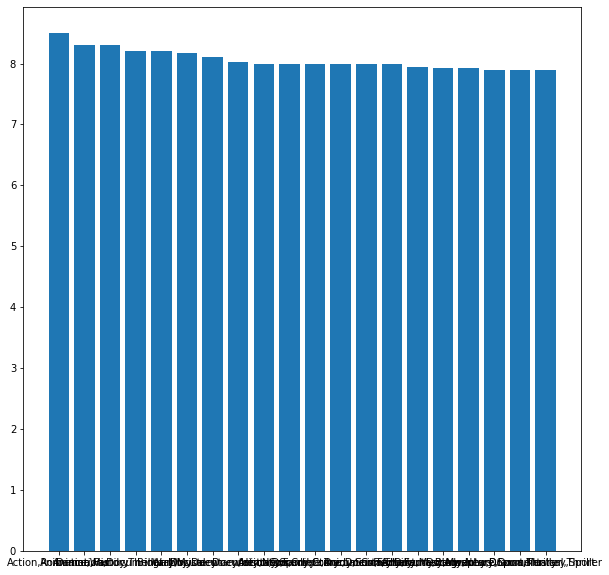

In [402]:
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=genres_average_rating.index.astype(str), height=genres_average_rating['averagerating']);

In [403]:
#runtime_minutes vs start_year
runtime_year = sql_df.groupby(['start_year']).mean(['runtime_minutes']).sort_values(['start_year'])
runtime_year

,averagerating,numvotes,runtime_minutes
start_year,,,
2010,6.306378,32207.062703,104.954545
2011,6.209054,32552.066124,103.919634
2012,6.180998,30643.207294,103.789625
2013,6.231584,31468.162896,105.320943
2014,6.227380,28236.682393,104.743892
2015,6.241098,22376.908769,104.757764
2016,6.240018,22988.199642,106.046637
2017,6.238200,19243.393939,106.879706
2018,6.368102,18289.530850,109.436554


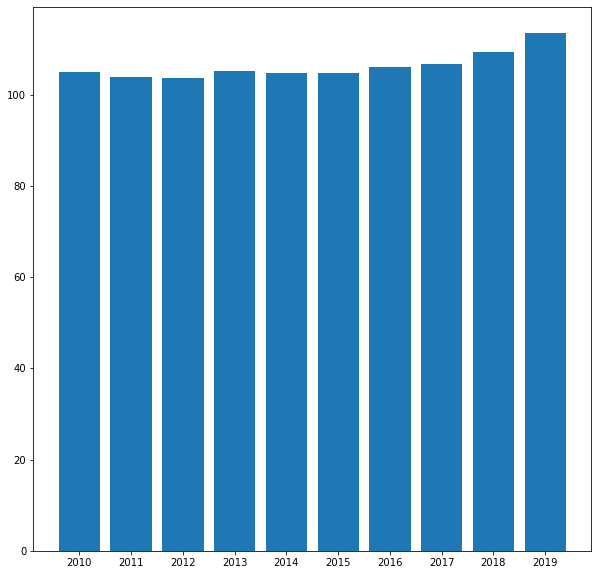

In [404]:
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x=runtime_year.index.astype(str), height=runtime_year['runtime_minutes']);

In [409]:
np.corrcoef(runtime_year.index , y = runtime_year['runtime_minutes'])

array([[1.        , 0.81055676],
       [0.81055676, 1.        ]])

In [405]:
sql_df['start_year'].value_counts()

2014    1187
2015    1129
2016    1117
2013    1105
2017    1089
2012    1042
2011     983
2010     925
2018     859
2019     181
Name: start_year, dtype: int64

In [406]:
sql_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
1,tt6058226,9.6,2604,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History"
2,tt4131686,9.6,1339,I Want to Live,I Want to Live,2015,106.0,"Adventure,Biography,Documentary"
3,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History"
4,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
...,...,...,...,...,...,...,...,...
9612,tt6038600,1.4,7383,Smolensk,Smolensk,2016,120.0,"Drama,Thriller"
9613,tt8081062,1.3,3244,Amazing China,"Li hai le, wo de guo",2018,90.0,Documentary
9614,tt4404474,1.3,6249,Potato Salad,Kartoffelsalat,2015,81.0,"Comedy,Horror"
9615,tt7221896,1.3,36986,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,100.0,Comedy


In [8]:
#rating['movie_id'].isnull().sum()

In [9]:
#rating['averagerating'].isnull().sum()

In [ ]:
#rating['numvotes'].isnull().sum()

In [ ]:
#pd.read_sql("""
#Select * 

#From persons
#where primary_profession like '%director%'
            
#""", con) #keep in back-pocket
        # maybe discuss in the next-steps

In [ ]:
#pd.read_sql("""
#Select * 

#From principals
            
#""", con).head()
#keep in back-pocket

In [ ]:
#pd.read_sql("""
#Select * 

#From writers
            
#""", con).head()
#back pocket?

In [5]:
con.close() #have this everytime just in case

In [6]:
os.remove('im.db') #This line deletes the im.db file created earlier.

NameError: name 'rating' is not defined